In [1]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import rc_context

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

2023-02-14 08:42:19.416457: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-14 08:42:19.552791: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-14 08:42:20.157129: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/lsfsuite/lsf/10.1/linux2.6-glibc2.3-x86_64/lib
2023-02-14 08:42:20.157220: W t

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.0 pandas==1.5.2 scikit-learn==1.2.0 statsmodels==0.13.5 python-igraph==0.10.2 pynndescent==0.5.8


In [2]:
pwd

'/mnt/ibm_lg/laura.garcia/glioblastoma/analysis/mcherry_alignment/5GEX/run2'

# Import and prepare data

Load matrix counts

In [3]:
import glob
mtx10X = glob.glob('/mnt/ibm_lg/laura.garcia/glioblastoma/matrix_counts/run3/*/*')

mtx10X.sort()
mtx10X

['/mnt/ibm_lg/laura.garcia/glioblastoma/matrix_counts/run3/C10/C10_adherent_pos_5GEX',
 '/mnt/ibm_lg/laura.garcia/glioblastoma/matrix_counts/run3/C7/C7_adherent_neg_5GEX',
 '/mnt/ibm_lg/laura.garcia/glioblastoma/matrix_counts/run3/C8/C8_adherent_neg_5GEX',
 '/mnt/ibm_lg/laura.garcia/glioblastoma/matrix_counts/run3/C9/C9_adherent_pos_5GEX',
 '/mnt/ibm_lg/laura.garcia/glioblastoma/matrix_counts/run3/S5/S5_neurospheres_pos_5GEX',
 '/mnt/ibm_lg/laura.garcia/glioblastoma/matrix_counts/run3/S6/S6_neurospheres_pos_5GEX',
 '/mnt/ibm_lg/laura.garcia/glioblastoma/matrix_counts/run3/S7/S7_neurospheres_pos_5GEX',
 '/mnt/ibm_lg/laura.garcia/glioblastoma/matrix_counts/run3/S8/S8_neurospheres_pos_5GEX']

Create h5ad object with metadata

In [4]:
adata = sc.AnnData()

for d in mtx10X:
    
    r = d.split("/")[8]
    try:
        adataaux = sc.read_10x_mtx(d+'/raw_feature_bc_matrix/',cache=True,var_names='gene_ids')
        
    except:
        adataaux = sc.read_10x_mtx(d,cache=True,var_names='gene_ids')
         

    print(r+ " size")
    display(adataaux.shape)

    adataaux.obs['sample_ID'] = r
    adataaux.obs['cell_id'] = adataaux.obs['sample_ID'] + "_" + adataaux.obs.index


    adataaux.obs['sample'] = r.split('_')[0]  
    adataaux.obs['sample_type'] = r.split('_')[1]  
    adataaux.obs['mCherry'] = r.split('_')[2]
    adataaux.obs['10x_type'] = r.split('_')[3] 
        
    try:
        adata = adata.concatenate(adataaux,join='outer')
        adata.obs = adata.obs.drop('batch',axis=1)
    except:
        adata = adataaux.copy()
        
adata.obs = adata.obs.set_index("cell_id")
adata

... reading from cache file cache/mnt-ibm_lg-laura.garcia-glioblastoma-matrix_counts-run3-C10-C10_adherent_pos_5GEX-matrix.h5ad
C10_adherent_pos_5GEX size


(737280, 54446)

... reading from cache file cache/mnt-ibm_lg-laura.garcia-glioblastoma-matrix_counts-run3-C7-C7_adherent_neg_5GEX-matrix.h5ad
C7_adherent_neg_5GEX size


(737280, 54446)

/data/laura.garcia/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


... reading from cache file cache/mnt-ibm_lg-laura.garcia-glioblastoma-matrix_counts-run3-C8-C8_adherent_neg_5GEX-matrix.h5ad
C8_adherent_neg_5GEX size


(737280, 54446)

/data/laura.garcia/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


... reading from cache file cache/mnt-ibm_lg-laura.garcia-glioblastoma-matrix_counts-run3-C9-C9_adherent_pos_5GEX-matrix.h5ad
C9_adherent_pos_5GEX size


(737280, 54446)

/data/laura.garcia/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


... reading from cache file cache/mnt-ibm_lg-laura.garcia-glioblastoma-matrix_counts-run3-S5-S5_neurospheres_pos_5GEX-matrix.h5ad
S5_neurospheres_pos_5GEX size


(737280, 54446)

/data/laura.garcia/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


... reading from cache file cache/mnt-ibm_lg-laura.garcia-glioblastoma-matrix_counts-run3-S6-S6_neurospheres_pos_5GEX-matrix.h5ad
S6_neurospheres_pos_5GEX size


(737280, 54446)

/data/laura.garcia/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


... reading from cache file cache/mnt-ibm_lg-laura.garcia-glioblastoma-matrix_counts-run3-S7-S7_neurospheres_pos_5GEX-matrix.h5ad
S7_neurospheres_pos_5GEX size


(737280, 54446)

/data/laura.garcia/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


... reading from cache file cache/mnt-ibm_lg-laura.garcia-glioblastoma-matrix_counts-run3-S8-S8_neurospheres_pos_5GEX-matrix.h5ad
S8_neurospheres_pos_5GEX size


(737280, 54446)

/data/laura.garcia/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


AnnData object with n_obs × n_vars = 5898240 × 54446
    obs: 'sample_ID', 'sample', 'sample_type', 'mCherry', '10x_type'
    var: 'gene_symbols', 'feature_types'

In [5]:
adata.obs

,sample_ID,sample,sample_type,mCherry,10x_type
cell_id,,,,,
C10_adherent_pos_5GEX_AAACCTGAGAAACCAT-1,C10_adherent_pos_5GEX,C10,adherent,pos,5GEX
C10_adherent_pos_5GEX_AAACCTGAGAAACCGC-1,C10_adherent_pos_5GEX,C10,adherent,pos,5GEX
C10_adherent_pos_5GEX_AAACCTGAGAAACCTA-1,C10_adherent_pos_5GEX,C10,adherent,pos,5GEX
C10_adherent_pos_5GEX_AAACCTGAGAAACGAG-1,C10_adherent_pos_5GEX,C10,adherent,pos,5GEX
C10_adherent_pos_5GEX_AAACCTGAGAAACGCC-1,C10_adherent_pos_5GEX,C10,adherent,pos,5GEX
...,...,...,...,...,...
S8_neurospheres_pos_5GEX_TTTGTCATCTTTACAC-1,S8_neurospheres_pos_5GEX,S8,neurospheres,pos,5GEX
S8_neurospheres_pos_5GEX_TTTGTCATCTTTACGT-1,S8_neurospheres_pos_5GEX,S8,neurospheres,pos,5GEX
S8_neurospheres_pos_5GEX_TTTGTCATCTTTAGGG-1,S8_neurospheres_pos_5GEX,S8,neurospheres,pos,5GEX


In [6]:
set(adata.obs["sample_ID"])

{'C10_adherent_pos_5GEX',
 'C7_adherent_neg_5GEX',
 'C8_adherent_neg_5GEX',
 'C9_adherent_pos_5GEX',
 'S5_neurospheres_pos_5GEX',
 'S6_neurospheres_pos_5GEX',
 'S7_neurospheres_pos_5GEX',
 'S8_neurospheres_pos_5GEX'}

In [7]:
adata.var["ensemblid"] = adata.var.index.astype(str)
adata.var["gene_symbol"] = adata.var["gene_symbols"].astype(str)
adata.var["index"] = adata.var["gene_symbol"]
adata.var = adata.var.set_index("index")

adata.var.head()

,gene_symbols,feature_types,ensemblid,gene_symbol
index,,,,
4933401J01Rik,4933401J01Rik,Gene Expression,ENSMUSG00000102693.1,4933401J01Rik
Gm26206,Gm26206,Gene Expression,ENSMUSG00000064842.1,Gm26206
Xkr4,Xkr4,Gene Expression,ENSMUSG00000051951.5,Xkr4
Gm18956,Gm18956,Gene Expression,ENSMUSG00000102851.1,Gm18956
Gm37180,Gm37180,Gene Expression,ENSMUSG00000103377.1,Gm37180


In [8]:
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 5898240 × 54446
    obs: 'sample_ID', 'sample', 'sample_type', 'mCherry', '10x_type'
    var: 'gene_symbols', 'feature_types', 'ensemblid', 'gene_symbol'

In [9]:
print(adata.obs['sample'].value_counts())

C10    737280
C7     737280
C8     737280
C9     737280
S5     737280
S6     737280
S7     737280
S8     737280
Name: sample, dtype: int64


In [10]:
# change sample_type
adata.obs['sample_type'] = 'AC'
adata.obs.loc[adata.obs['sample'].isin(['S5', 'S6', 'S7', 'S8']), 'sample_type'] = 'NS'
adata.obs.loc[adata.obs['sample'].isin(['C9','C10']), 'sample_type'] = "AC-2"


In [11]:
# add metadata
adata.obs['time'] = 'NA'
adata.obs['treatment'] = 'NA'
adata.obs['technology'] = '5GEX'

# Filtering

In [33]:
adata = sc.read_h5ad('/mnt/ibm_lg/laura.garcia/glioblastoma/analysis/mcherry_alignment/5GEX/run2/data/5GEX_run2_raw.h5ad')


In [35]:
adata

AnnData object with n_obs × n_vars = 5898240 × 54446
    obs: 'sample_ID', 'sample', 'sample_type', 'mCherry', '10x_type', 'time', 'treatment', 'technology'
    var: 'gene_symbols', 'feature_types', 'ensemblid', 'gene_symbol', 'chromosome', 'start', 'end'

Compute QC metrics

In [36]:
adata.var["mt"] = adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

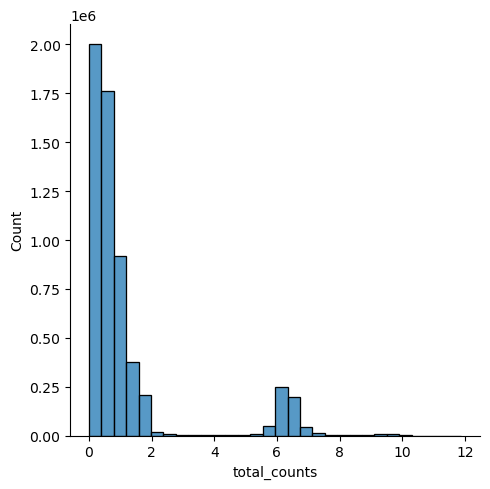

In [37]:
sns.displot(np.log1p(adata.obs['total_counts']), bins=30, discrete=False, kde=False);

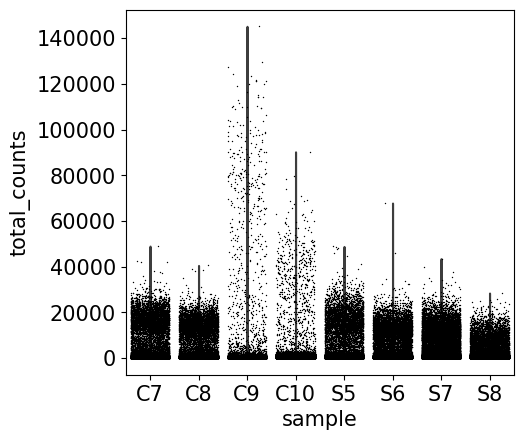

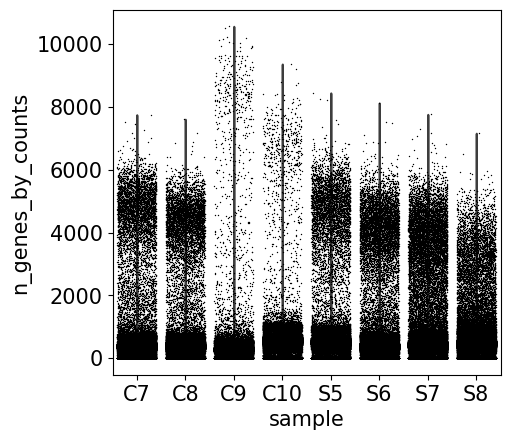

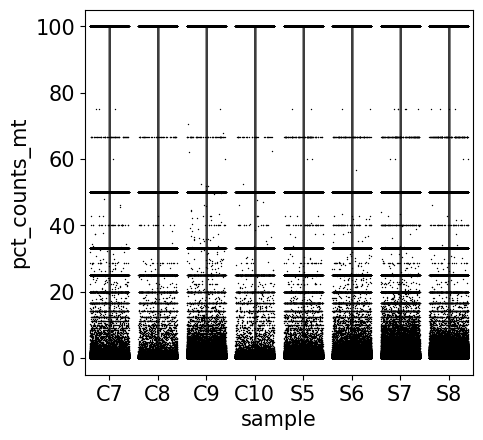

In [38]:
with rc_context({'font.size': 15.0,'figure.figsize': (5, 5)}):

    sc.pl.violin(adata, 'total_counts', groupby='sample', jitter=0.4)
    sc.pl.violin(adata, 'n_genes_by_counts', groupby='sample', jitter=0.4)
    sc.pl.violin(adata, 'pct_counts_mt', groupby='sample', jitter=0.4)

Data quality summary plots

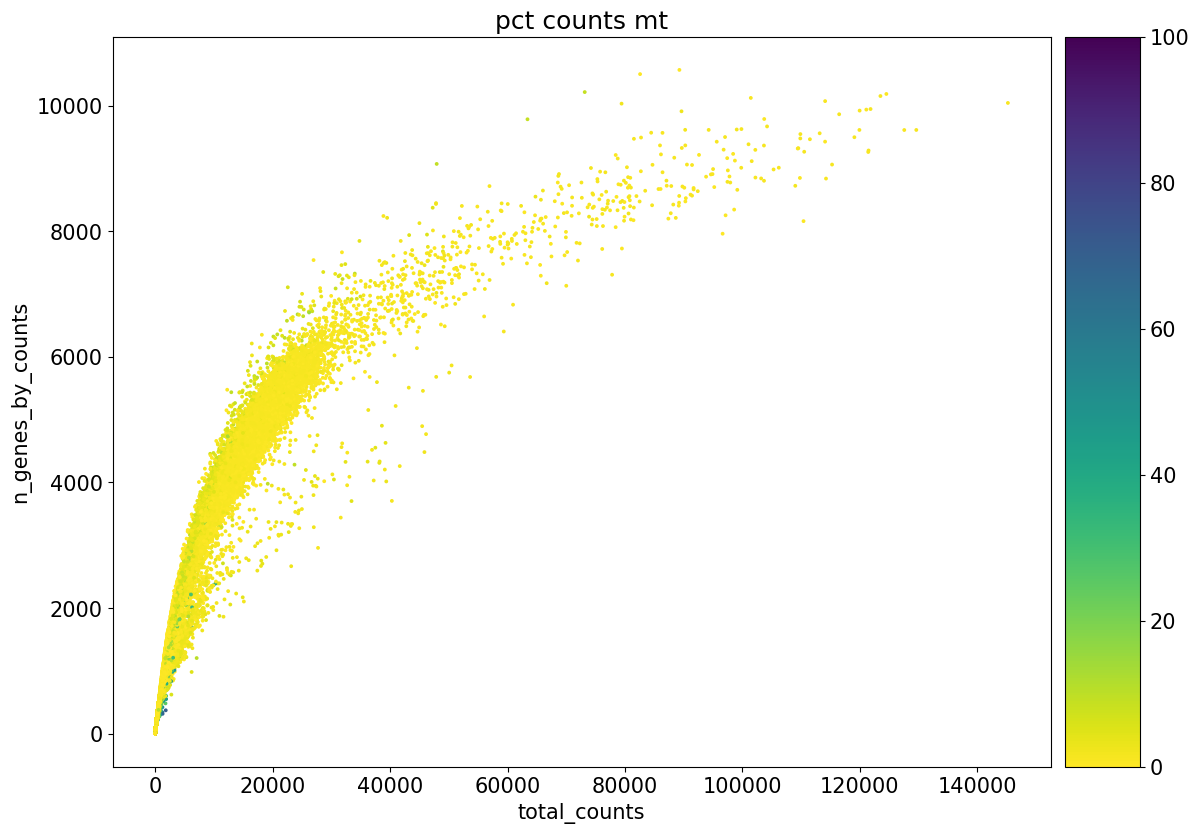

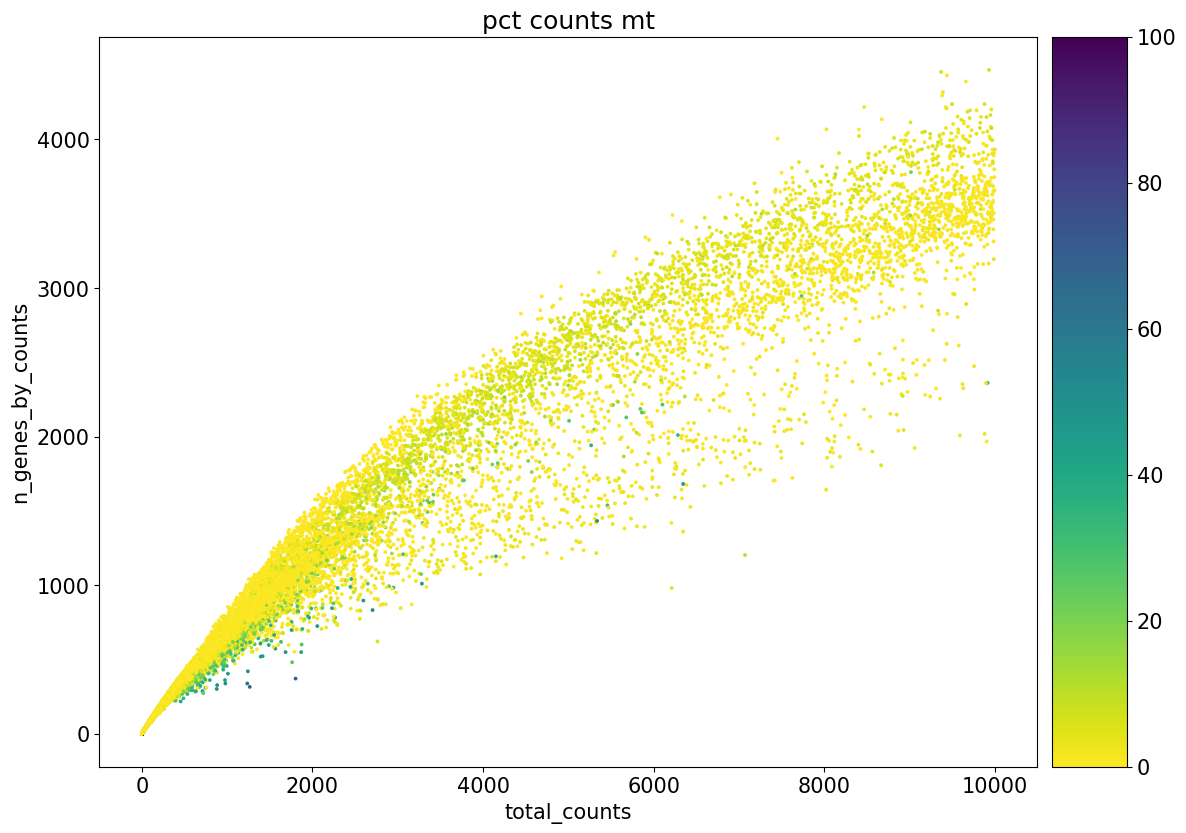

In [39]:
with rc_context({'font.size': 15.0,'figure.figsize': (10, 10)}):

    sc.pl.scatter(adata, 'total_counts', 'n_genes_by_counts', color='pct_counts_mt', size=30, color_map='viridis_r')
    sc.pl.scatter(adata[adata.obs['total_counts']<10000], 'total_counts', 'n_genes_by_counts', 
                  color='pct_counts_mt', size=30, color_map='viridis_r');


Thresholding decision: counts
Here we check the univariate distributions for low-quality outlier peaks. We especially zoom in on lower values

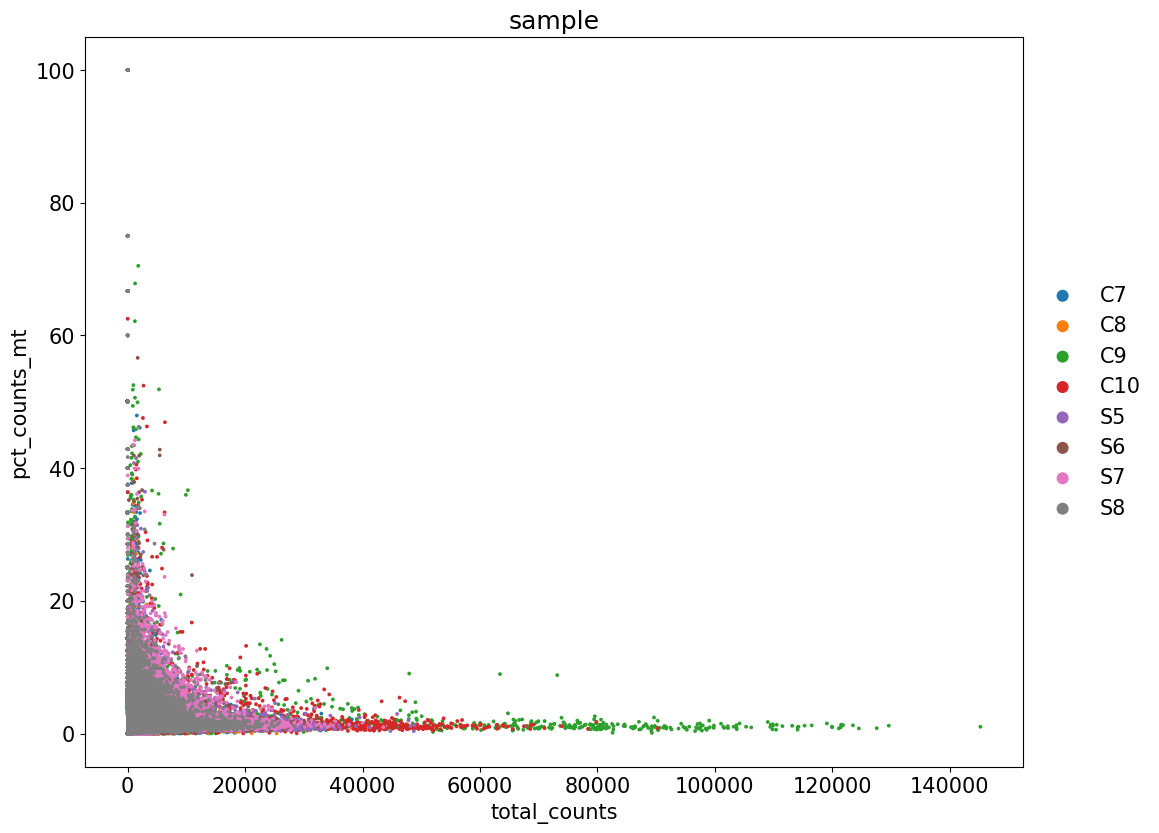

In [40]:
with rc_context({'font.size': 15.0,'figure.figsize': (10, 10)}):

    sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color="sample", size=30, color_map='viridis_r')

normalizing counts per cell


/data/laura.garcia/miniconda3/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


    finished (0:00:03)


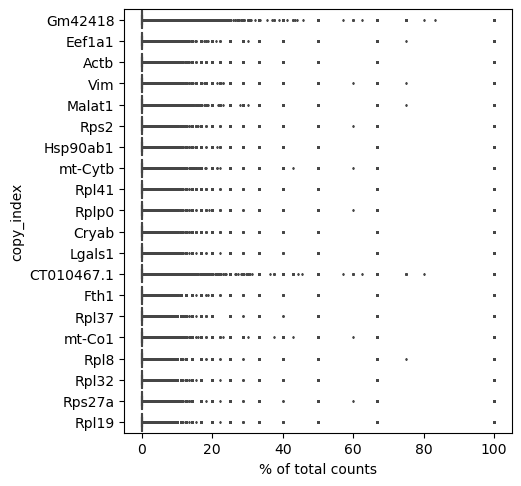

In [41]:
sc.pl.highest_expr_genes(adata, n_top=20)

/tmp/ipykernel_74511/551345533.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs['total_counts'][adata.obs['total_counts']<8000], ax=axes[0,0], kde=False, bins=30)
/tmp/ipykernel_74511/551345533.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs['total_counts'][adata.obs['

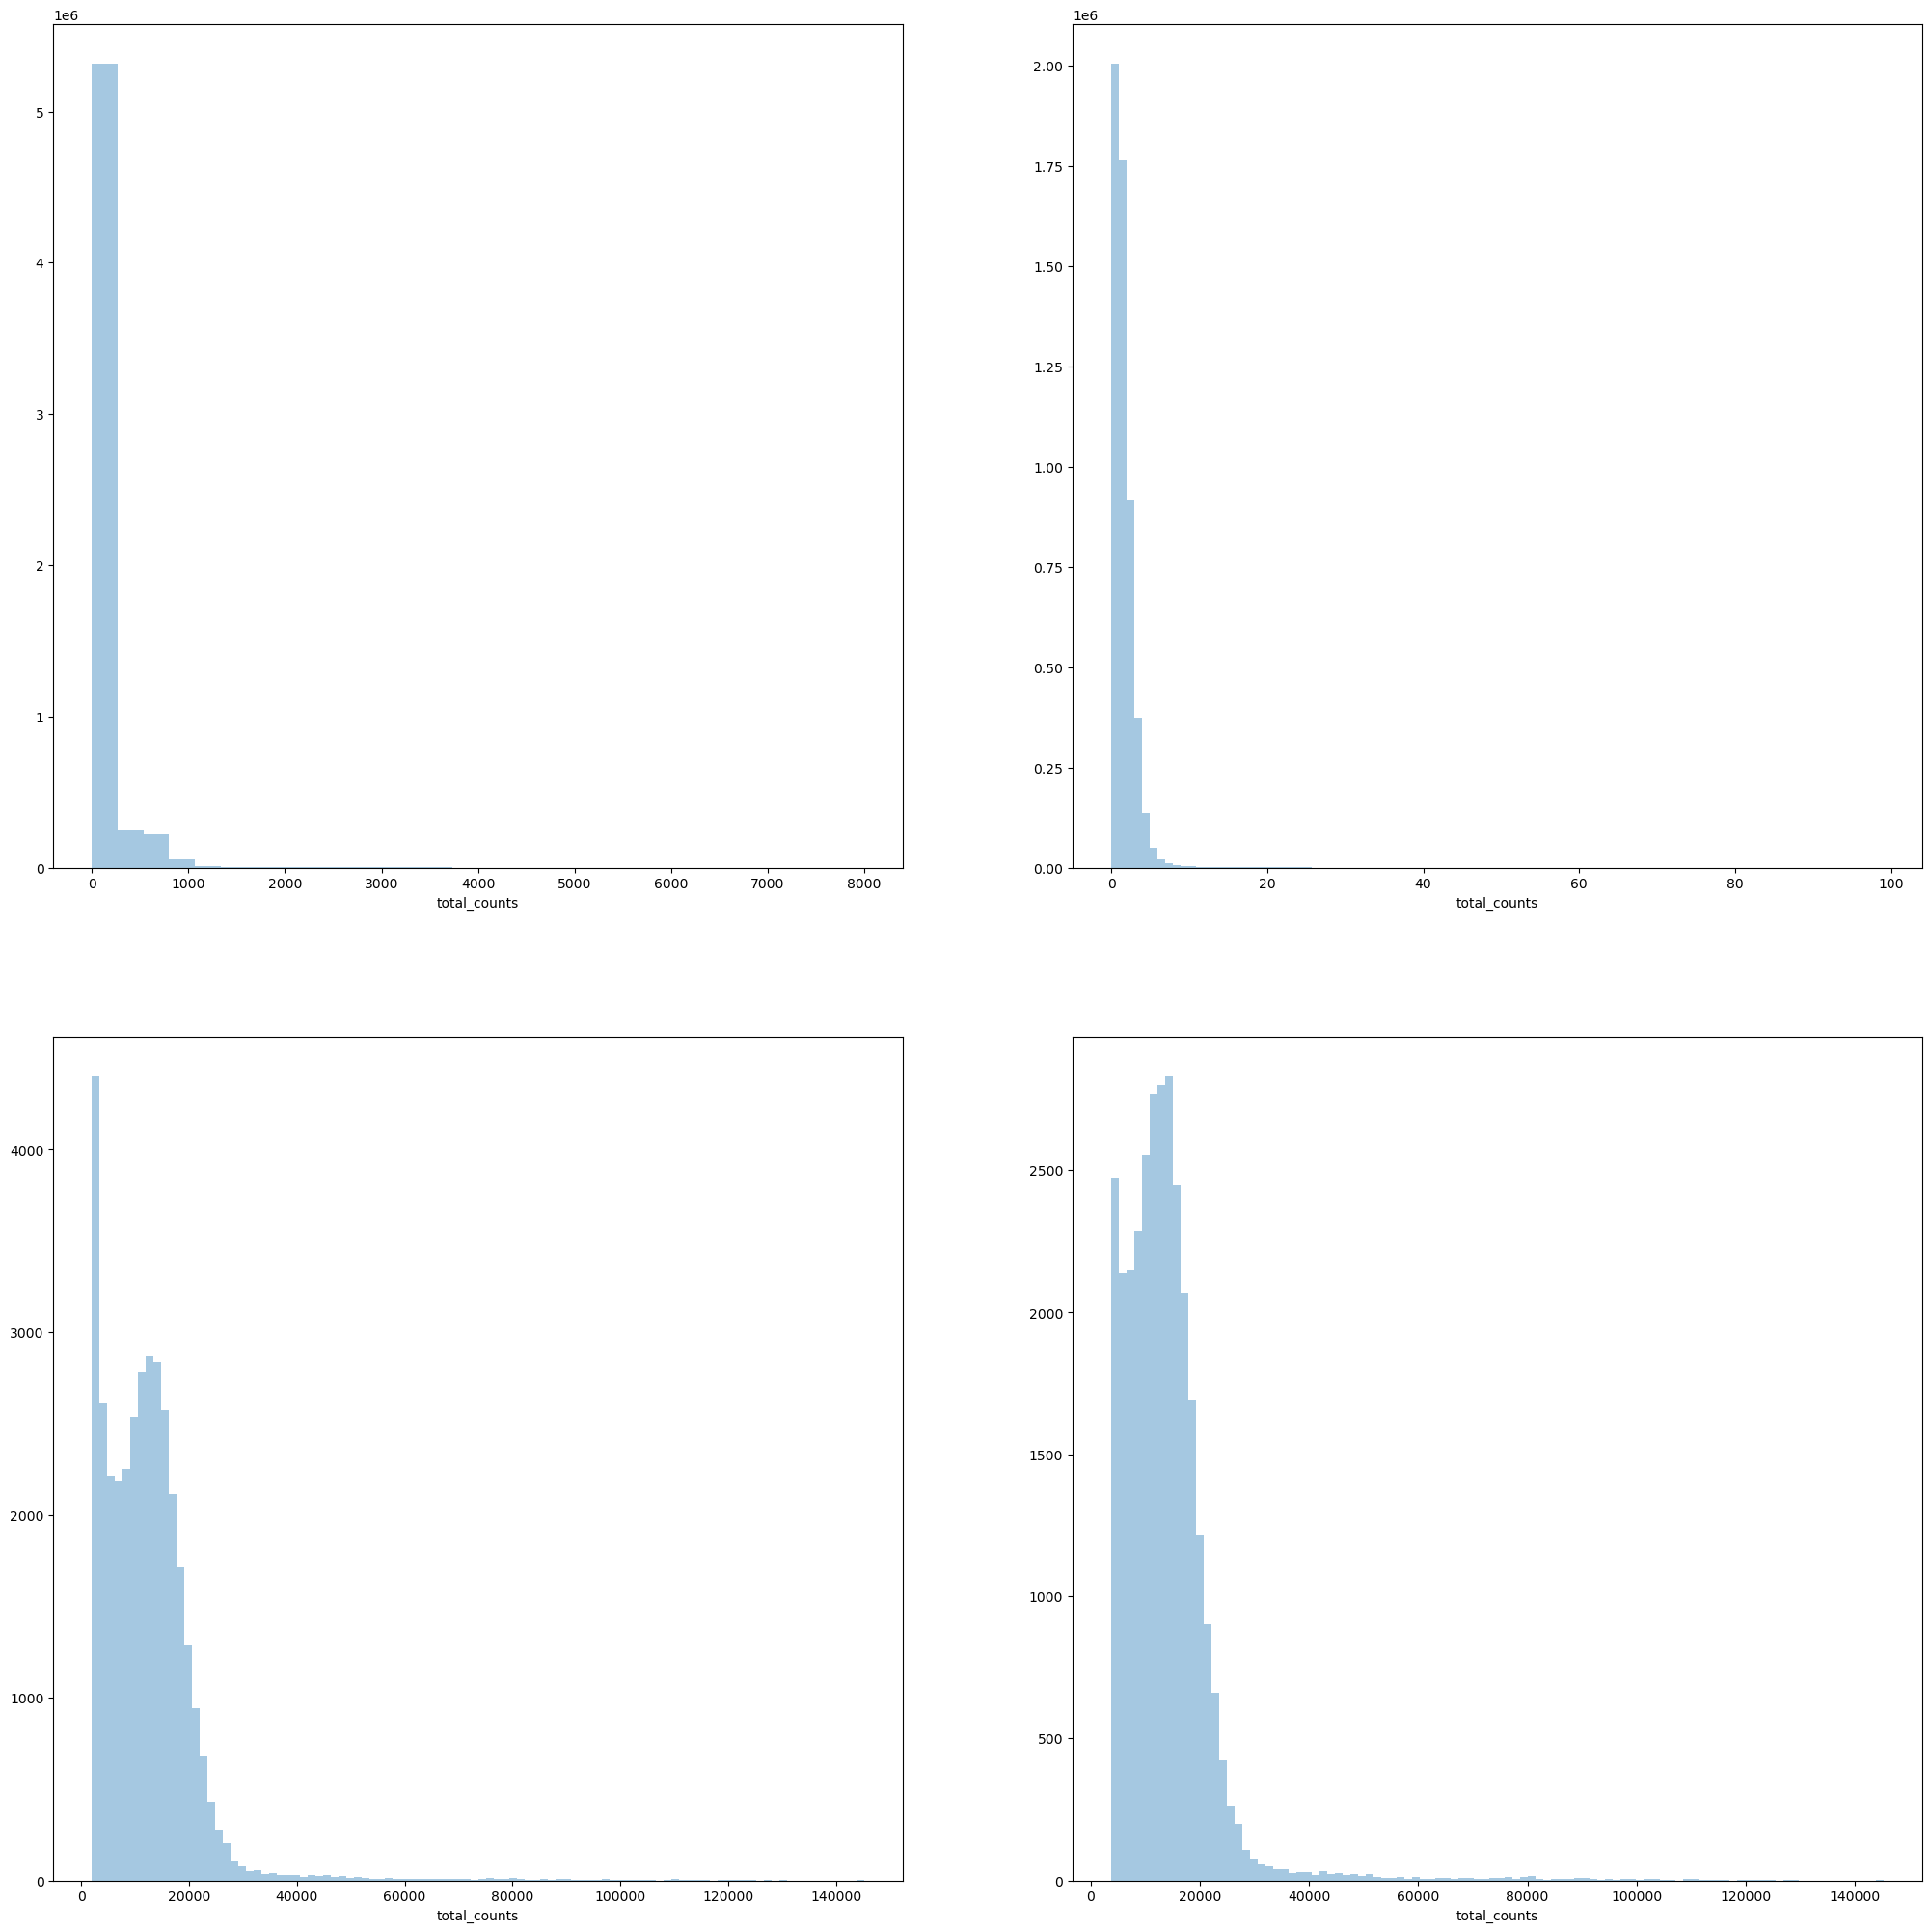

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(25, 25))

sns.distplot(adata.obs['total_counts'][adata.obs['total_counts']<8000], ax=axes[0,0], kde=False, bins=30)
sns.distplot(adata.obs['total_counts'][adata.obs['total_counts']<100], ax=axes[0,1], kde=False, bins=100)
sns.distplot(adata.obs['total_counts'][adata.obs['total_counts']>2000], ax=axes[1,0], kde=False, bins=100)
sns.distplot(adata.obs['total_counts'][adata.obs['total_counts']>3750], ax=axes[1,1], kde=False, bins=100);


In [43]:
np.median(adata.obs['n_genes_by_counts'])

1.0

#### Thresholding decision: genes

/tmp/ipykernel_74511/1797816038.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs['n_genes_by_counts'], ax=axes[0,0], kde=False, bins=30)
/tmp/ipykernel_74511/1797816038.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs['n_genes_by_counts'][adata.obs['n_genes_by_counts']<

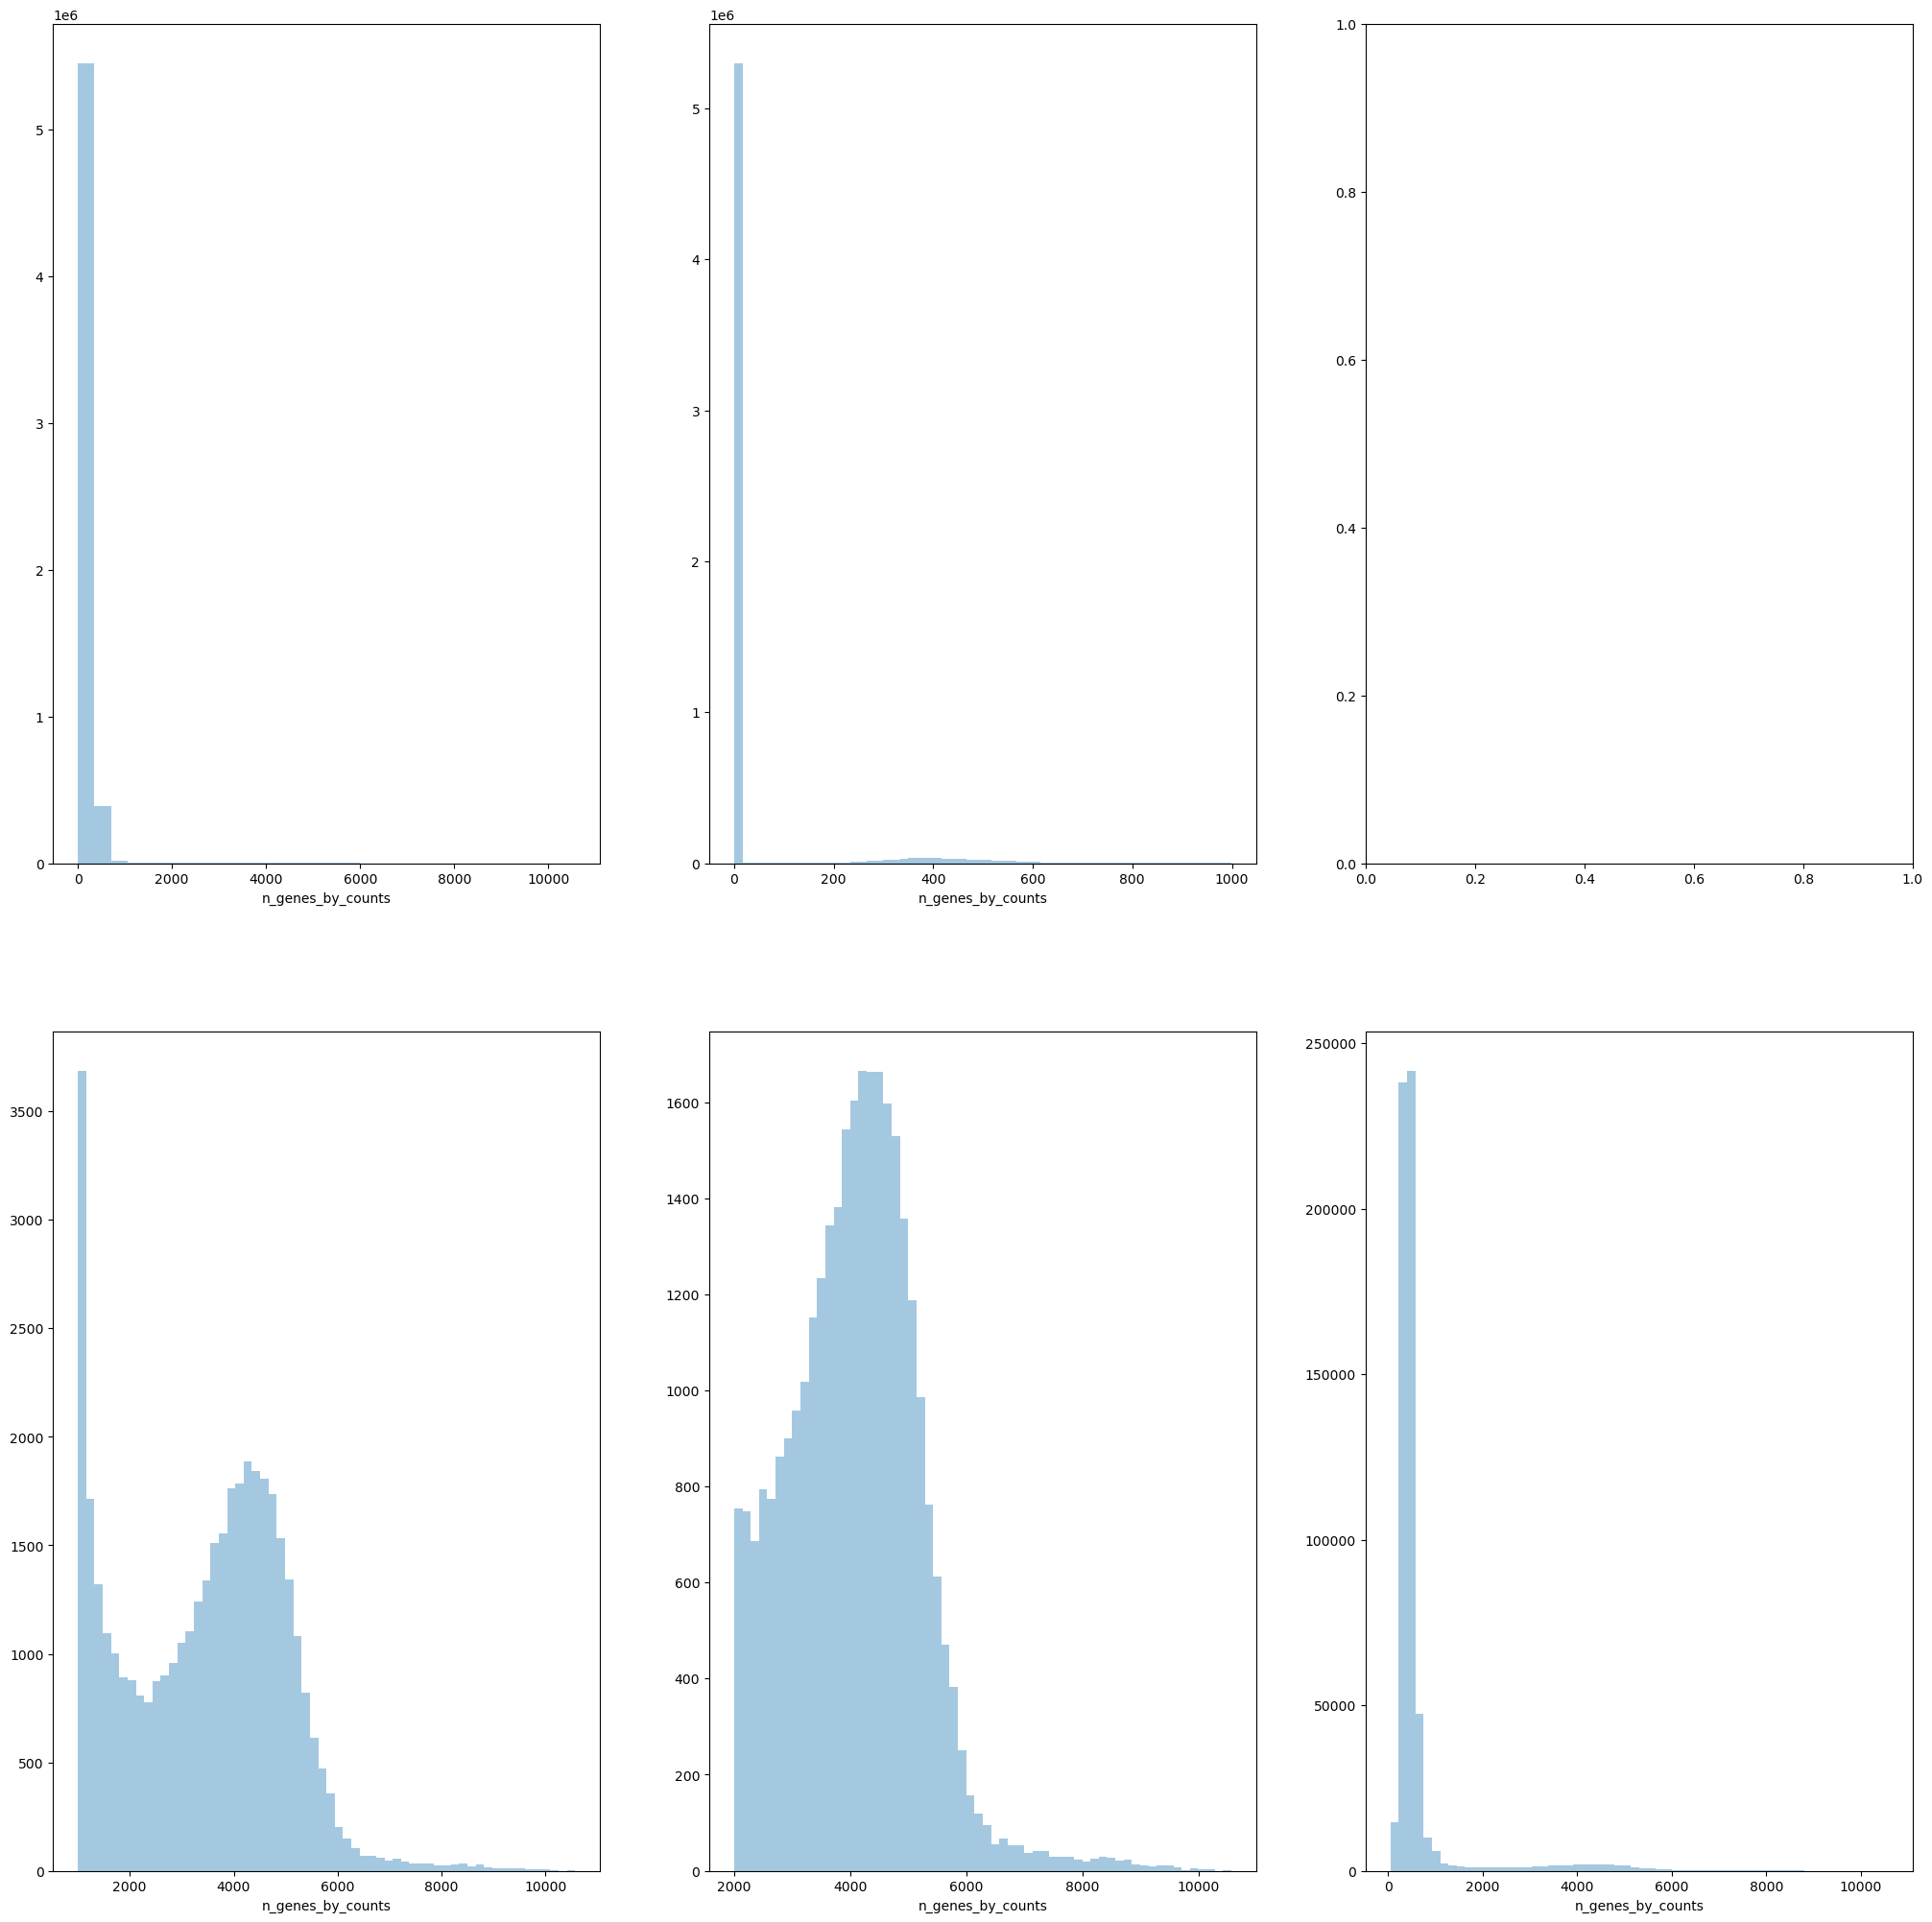

In [44]:
fig, axes = plt.subplots(2, 3, figsize=(25, 25))

sns.distplot(adata.obs['n_genes_by_counts'], ax=axes[0,0], kde=False, bins=30)
sns.distplot(adata.obs['n_genes_by_counts'][adata.obs['n_genes_by_counts']<1000], ax=axes[0,1], kde=False, bins=60)
sns.distplot(adata.obs['n_genes_by_counts'][adata.obs['n_genes_by_counts']>1000], ax=axes[1,0], kde=False, bins=60)
sns.distplot(adata.obs['n_genes_by_counts'][adata.obs['n_genes_by_counts']>2000], ax=axes[1,1], kde=False, bins=60)
sns.distplot(adata.obs['n_genes_by_counts'][adata.obs['n_genes_by_counts']>50], ax=axes[1,2], kde=False, bins=60);


Visualize the chosen thresholds jointly, before filtering out cells

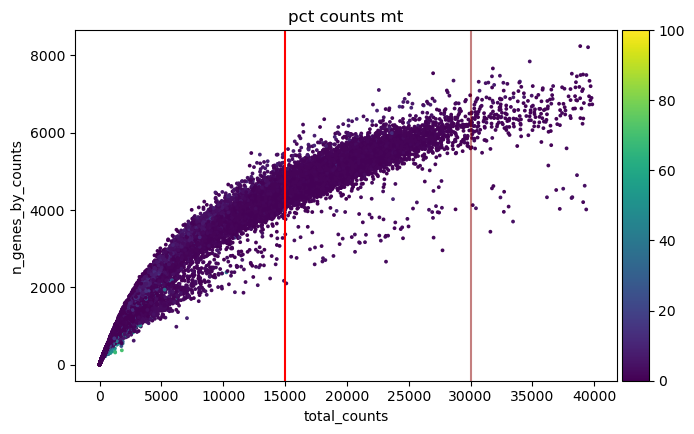

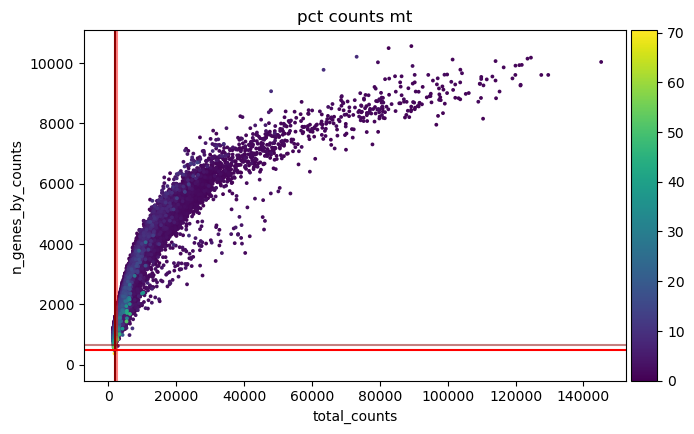

In [45]:
counts_upper = 15000
counts_upper_alt = 30000
counts_lower = 2500
counts_lower_alt = 2000
genes_lower = 500
genes_lower_alt = 650

with rc_context({'font.size': 10.0}):


    p1 = sc.pl.scatter(adata[adata.obs['total_counts']<40000], 'total_counts', 'n_genes_by_counts', color='pct_counts_mt', size=30, show=False)
    p1.axline((counts_upper,0),(counts_upper,1), color='red')
    p1.axline((counts_upper_alt,0),(counts_upper_alt,1), color='darkred', alpha=0.5);

    p2 = sc.pl.scatter(adata[adata.obs['total_counts']>1500], 'total_counts', 'n_genes_by_counts', color='pct_counts_mt', size=30, show=False)
    p2.axline((counts_lower,0),(counts_lower,1), color='red', alpha=0.5)
    p2.axline((counts_lower_alt,0),(counts_lower_alt,1), color='darkred')
    p2.axline((0,genes_lower),(1,genes_lower), color='red')
    p2.axline((0,genes_lower_alt),(1,genes_lower_alt), color='darkred', alpha=0.5);

# why two clouds?


In [46]:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_counts = 2500)
print('Number of cells after min count filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_counts = 20000)
print('Number of cells after max count filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_genes = 500)
print('Number of cells after gene filter: {:d}'.format(adata.n_obs))

Total number of cells: 5898240
filtered out 5864345 cells that have less than 2500 counts
Number of cells after min count filter: 33895
filtered out 3932 cells that have more than 20000 counts
Number of cells after max count filter: 29963
Number of cells after gene filter: 29963


Remove cells with a high percentage of mitochondrial reads

In [47]:
adata = adata[adata.obs['pct_counts_mt']< 10].copy() 
print('Number of cells after pct_counts_mt filter: {:d}'.format(adata.n_obs))

Number of cells after pct_counts_mt filter: 29372


In [48]:
adata

AnnData object with n_obs × n_vars = 29372 × 54446
    obs: 'sample_ID', 'sample', 'sample_type', 'mCherry', '10x_type', 'time', 'treatment', 'technology', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'n_genes'
    var: 'gene_symbols', 'feature_types', 'ensemblid', 'gene_symbol', 'chromosome', 'start', 'end', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'sample_colors'

In [49]:
adata.write('/mnt/ibm_lg/laura.garcia/glioblastoma/analysis/mcherry_alignment/5GEX/run2/data/5GEX_run2_cellsfilt.h5ad')


In [81]:
adata = sc.read('/mnt/ibm_lg/laura.garcia/glioblastoma/analysis/mcherry_alignment/5GEX/run2/data/5GEX_run2_cellsfilt.h5ad')


In [82]:
print('Total number of genes: {:d}'.format(adata.n_vars))

sc.pp.filter_genes(adata, min_cells=10)
print('Number of genes after cell filter: {:d}'.format(adata.n_vars))

Total number of genes: 54446
filtered out 32137 genes that are detected in less than 10 cells
Number of genes after cell filter: 22309


Remove mitochondrial and malat genes

In [83]:
malat1 = adata.var_names.str.startswith('malat1')
mito_genes = adata.var_names.str.startswith('mt-')
remove = np.add(mito_genes, malat1)
keep = np.invert(remove)

adata = adata[:,keep]

print(adata.n_obs, adata.n_vars)


29372 22294


In [84]:
adata.write('/mnt/ibm_lg/laura.garcia/glioblastoma/analysis/mcherry_alignment/5GEX/run2/data/5GEX_run2_filtered.h5ad')

# Cells filtered

## Normalization

Load data filtered only for cells

In [85]:
adata = sc.read('/mnt/ibm_lg/laura.garcia/glioblastoma/analysis/mcherry_alignment/5GEX/run2/data/5GEX_run2_cellsfilt.h5ad')


In [86]:
adata

AnnData object with n_obs × n_vars = 29372 × 54446
    obs: 'sample_ID', 'sample', 'sample_type', 'mCherry', '10x_type', 'time', 'treatment', 'technology', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'n_genes'
    var: 'gene_symbols', 'feature_types', 'ensemblid', 'gene_symbol', 'chromosome', 'start', 'end', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'sample_colors'

Save raw counts in raw slot

Normalize, and logarimize data

In [87]:
adata.raw = adata

In [88]:
sc.pp.normalize_total(adata, target_sum=1e4) # normalize to depth 10000
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


Predict doublets using Scrublet package and add prediction into anndata object

Check if our predicted doublets have more detected genes

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.65
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 35.3%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.1%
Elapsed time: 52.5 seconds


9

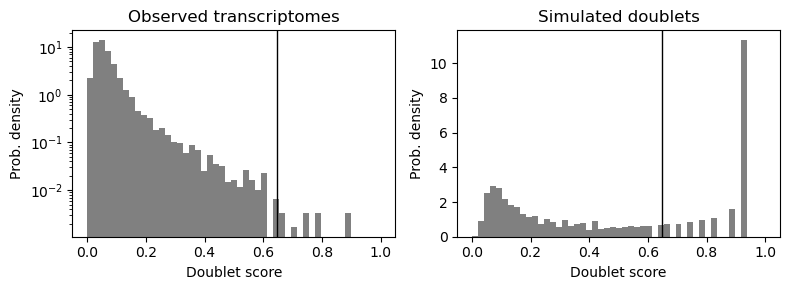

In [89]:
import scrublet as scr
scrub = scr.Scrublet(adata.raw.X)
adata.obs['doublet_scores'], adata.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

sum(adata.obs['predicted_doublets'])

In [90]:
# add in column with singlet/doublet instead of True/False
adata.obs['doublet_info'] = adata.obs["predicted_doublets"].astype(str)

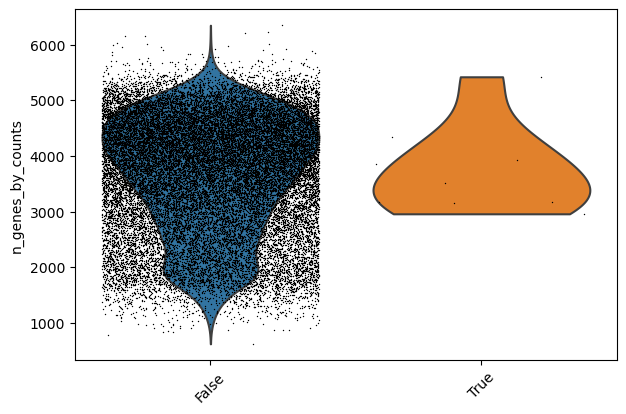

In [91]:
sc.pl.violin(adata, 'n_genes_by_counts',
             jitter=0.4, groupby = 'doublet_info', rotation=45)

Compute highly variable genes and scale data

In [92]:
sc.pp.highly_variable_genes(adata)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)



 Number of highly variable genes: 3016


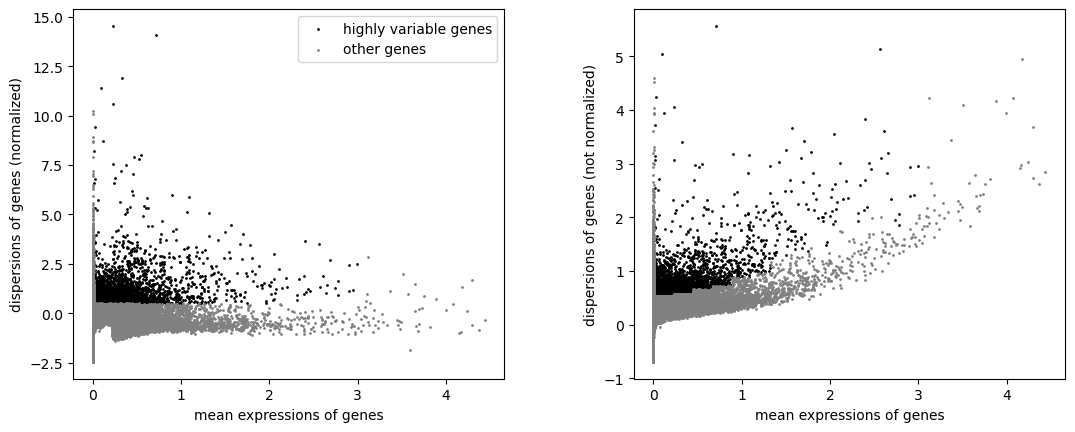

In [93]:
print('\n','Number of highly variable genes: {:d}'.format(np.sum(adata.var['highly_variable'])))
sc.pl.highly_variable_genes(adata)

In [94]:
sc.pp.scale(adata)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


# PCA

In [95]:
from matplotlib.pyplot import rc_context
from matplotlib.pyplot import rcParams
from matplotlib import colors

In [96]:
sc.pp.pca(adata, n_comps=50, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added='leiden')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:06)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:23)
running Leiden clustering
    finished: found 19 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


### Create color palettes

In [97]:
tab20c = sns.color_palette("tab20c").as_hex()
print(tab20c)

['#3182bd', '#6baed6', '#9ecae1', '#c6dbef', '#e6550d', '#fd8d3c', '#fdae6b', '#fdd0a2', '#31a354', '#74c476', '#a1d99b', '#c7e9c0', '#756bb1', '#9e9ac8', '#bcbddc', '#dadaeb', '#636363', '#969696', '#bdbdbd', '#d9d9d9']


Reorder sample type category

In [98]:
tab20b = sns.color_palette("tab20b").as_hex()
print(tab20b)

['#393b79', '#5254a3', '#6b6ecf', '#9c9ede', '#637939', '#8ca252', '#b5cf6b', '#cedb9c', '#8c6d31', '#bd9e39', '#e7ba52', '#e7cb94', '#843c39', '#ad494a', '#d6616b', '#e7969c', '#7b4173', '#a55194', '#ce6dbd', '#de9ed6']


In [99]:
sample_type = [tab20c[1], tab20c[13], tab20c[5]]
# sample = [tab20b[2],tab20b[6],tab20b[10],tab20b[14],tab20b[3],tab20b[7],tab20b[11],tab20b[15]]

In [100]:
# sample = ['lightskyblue', 'cornflowerblue',
#           'plum','mediumpurple',
#           'coral','navajowhite','sandybrown','lightcoral',
#           ]

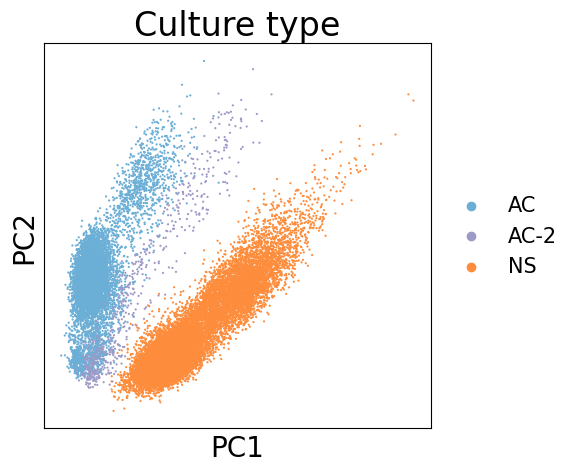

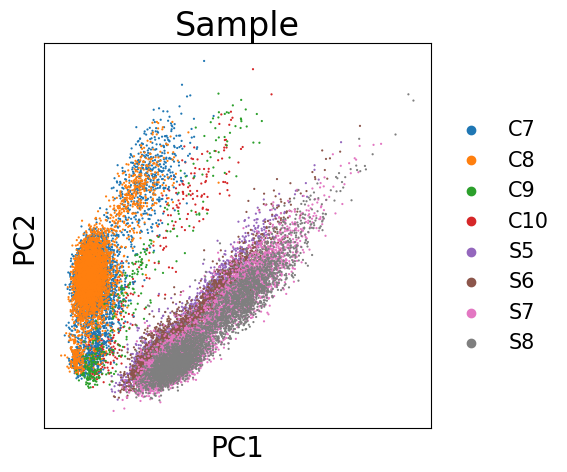

In [101]:
with rc_context({'font.size': 20.0,'figure.figsize': (5, 5)}):
    pca1 = sc.pl.pca(adata, color='sample_type', wspace=0.5, palette=sample_type, 
                    size=10, title='Culture type', frameon=True, legend_loc='right margin',
                    legend_fontsize=15, legend_fontweight='medium')
    pca2 = sc.pl.pca(adata, color='sample', wspace=0.5, legend_fontsize=15,  
                    size=10, title='Sample', legend_loc='right margin')


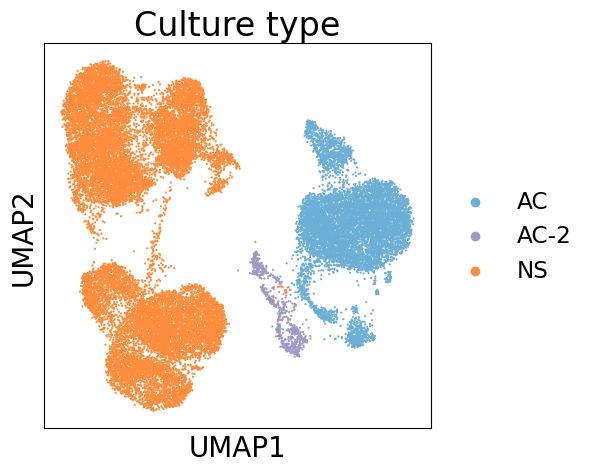

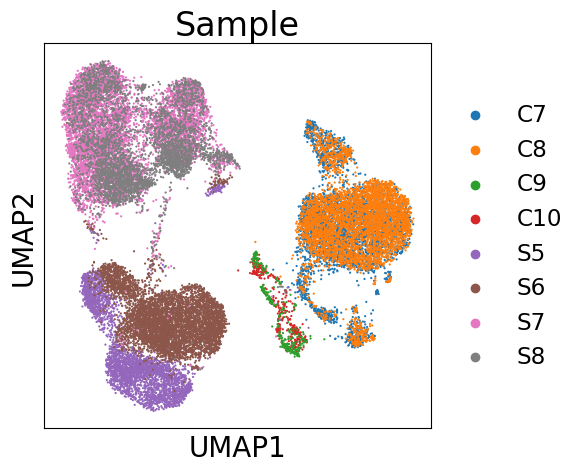

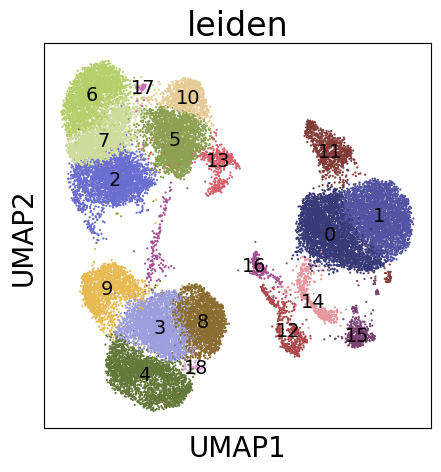

In [102]:
with rc_context({'font.size': 20.0,'figure.figsize': (5, 5)}):
    umap1 = sc.pl.umap(adata, color=['sample_type'], palette=sample_type, legend_loc='right margin',
                       legend_fontsize='small', legend_fontweight='medium', size=10, 
                       title='Culture type')
    
    umap2 = sc.pl.umap(adata, color=['sample'], 
                       legend_fontsize='small', size=10, title='Sample')
    
    umap3 = sc.pl.umap(adata, color=['leiden'], palette='tab20b', legend_loc='on data', 
                       legend_fontsize='x-small', legend_fontweight='medium', size=10)

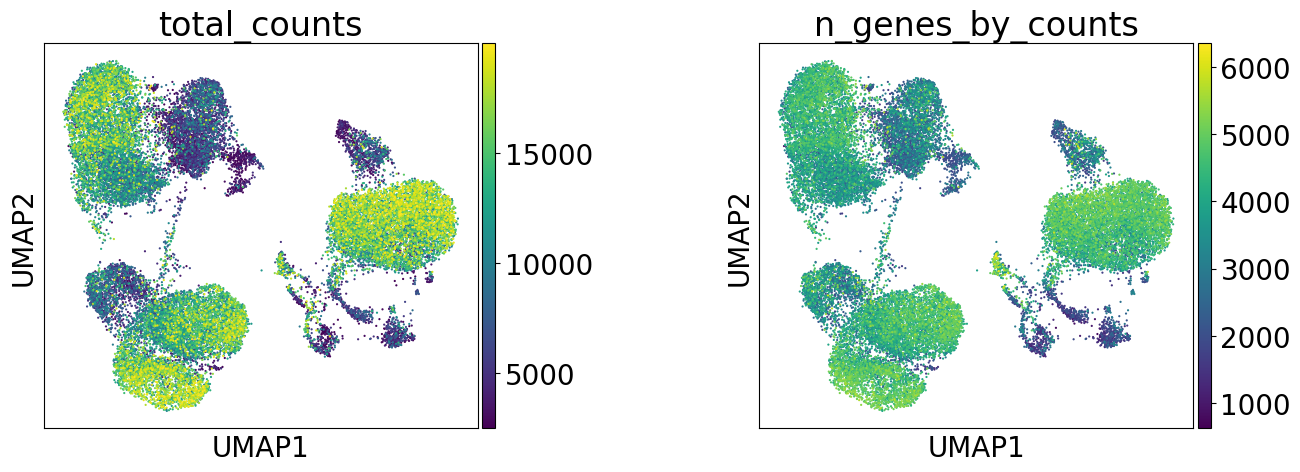

In [104]:
with rc_context({'font.size': 20.0, 'figure.figsize': (5, 5)}):
    sc.pl.umap(adata, color=['total_counts','n_genes_by_counts'], wspace=0.5, size=10)

### Score cell cycle genes

In [105]:
# load cell cycle genes
cell_cycle_genes = [x.strip() for x in open('/mnt/ibm_lg/laura.garcia/glioblastoma/analysis/pilot/multiome/cell_cycle/cell_cycle_genes.txt')]

# Define sets of genes
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]

In [106]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

calculating cell cycle phase
computing score 'S_score'


/data/laura.garcia/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'S_score', score of gene set (adata.obs).
    172 total control genes are used. (0:00:01)
computing score 'G2M_score'


/data/laura.garcia/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'G2M_score', score of gene set (adata.obs).
    170 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)


In [107]:
phase = ['palevioletred','turquoise', 'silver']

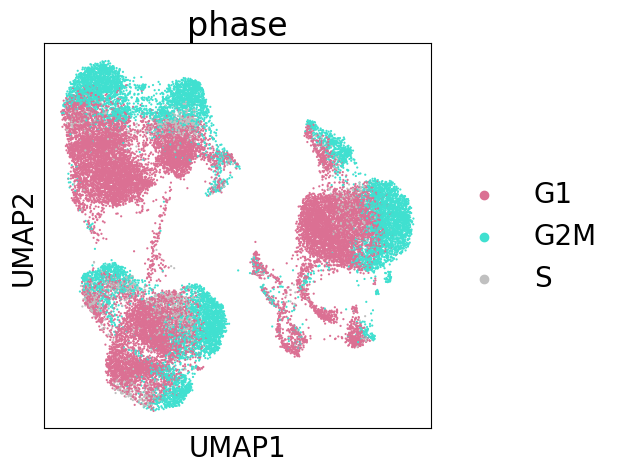

In [108]:
with rc_context({'font.size': 20.0, 'figure.figsize': (5, 5)}):
    sc.pl.umap(adata, color='phase', wspace=0.5, palette =phase, size=10)

In [109]:
adata.obs['phase'].cat.reorder_categories(['G1','S','G2M'], inplace=True)

/tmp/ipykernel_74511/1144722337.py:1: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata.obs['phase'].cat.reorder_categories(['G1','S','G2M'], inplace=True)


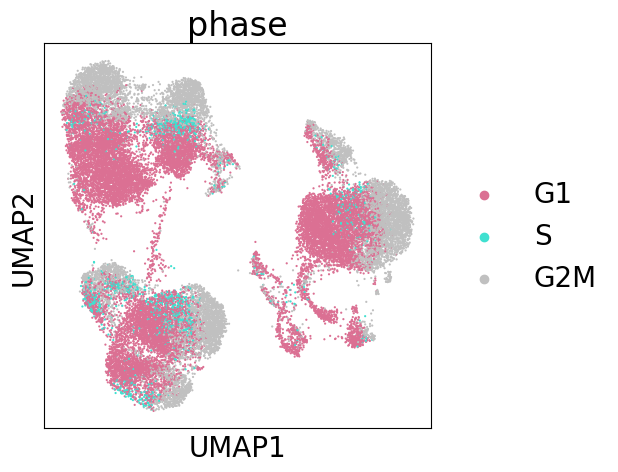

In [110]:
with rc_context({'font.size': 20.0, 'figure.figsize': (5, 5)}):
    sc.pl.umap(adata, color='phase', wspace=0.5, palette =phase, size=10)

In [111]:
adata.write('/mnt/ibm_lg/laura.garcia/glioblastoma/analysis/mcherry_alignment/5GEX/run2/data/5GEX_run2_processed.h5ad')


Plot genes related with cell cycle for different sample type

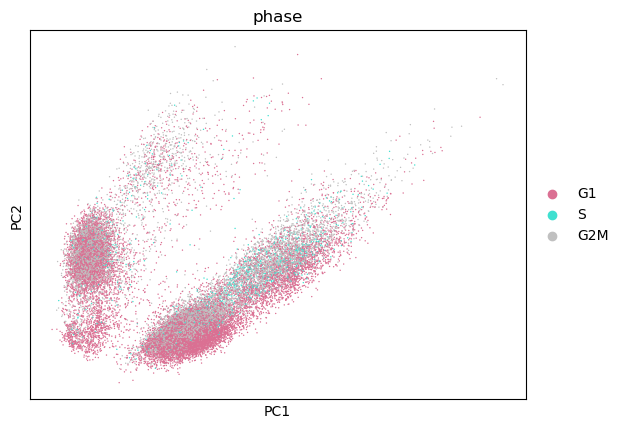

In [166]:
sc.pl.pca(adata, color='phase')

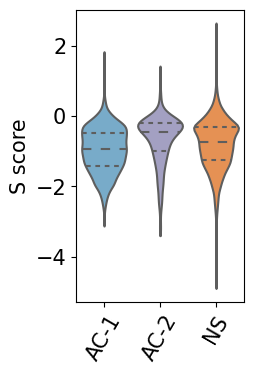

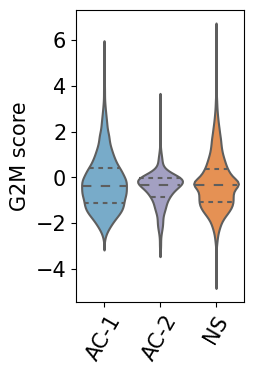

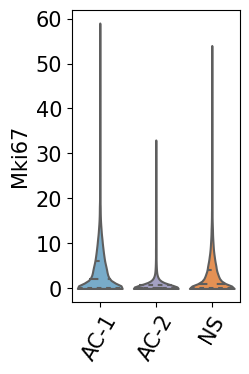

In [167]:
with rc_context({'font.size': 15.0,'figure.figsize': (3, 4)}):
    sc.pl.violin(adata, ['S_score'],
             stripplot=False, jitter=0.4, size=0.4, groupby = 'sample_type', rotation=60,
                 ylabel='S score', inner='quartile'
                )
    sc.pl.violin(adata, ['G2M_score'],
             stripplot=False, groupby = 'sample_type', rotation=60,
                 ylabel='G2M score', inner='quartile'
                )
    sc.pl.violin(adata, ['Mki67'],
             stripplot=False, groupby = 'sample_type', rotation=60,
                 inner='quartile'
                )